## resize video

In [34]:
import cv2

def resize_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    
    # Get original video dimensions
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Create a VideoWriter object to save the resized video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS), (640, 640))
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Resize the frame
        frame = cv2.resize(frame, (640, 640))
        
        # Write the resized frame to the output video
        out.write(frame)
        
        cv2.imshow('Resized Video', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage
video_path = './data/2.mp4'
output_path = './data/resized_input.mp4'
resize_video(video_path, output_path)


## optical flow

In [36]:
import cv2
import numpy as np
import pandas as pd

def analyze_optical_flow(video_path):
    cap = cv2.VideoCapture(video_path)
    
   
    lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    

    ret, prev_frame = cap.read()
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    prev_points = cv2.goodFeaturesToTrack(prev_gray, mask=None, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
    
    data = []  
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
      
        points, status, _ = cv2.calcOpticalFlowPyrLK(prev_gray, gray, prev_points, None, **lk_params)
        
        good_points = points[status == 1]
        
        flow_vectors = good_points - prev_points[status == 1]
        
        # Calculate magnitudes and angles of flow vectors
        magnitudes = np.linalg.norm(flow_vectors, axis=1)
        angles = np.arctan2(flow_vectors[:, 1], flow_vectors[:, 0])
        
       
        for i in range(len(good_points)):
            data.append([prev_points[i][0][0], prev_points[i][0][1], magnitudes[i], angles[i]])
        
       
        for (x, y), (dx, dy) in zip(good_points.reshape(-1, 2), flow_vectors):
            center = (int(x), int(y))  # Ensure center coordinates are integers
            cv2.circle(frame, center, 2, (0, 255, 0), -1)
            cv2.arrowedLine(frame, center, (int(x + dx), int(y + dy)), (0, 255, 0), 1)

        
        cv2.imshow('Optical Flow', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
 
        prev_gray = gray.copy()
        prev_points = good_points.reshape(-1, 1, 2)
    

    df = pd.DataFrame(data, columns=['x', 'y', 'magnitude', 'angle'])
    
    cap.release()
    cv2.destroyAllWindows()
    
    return df

# Example usage
video_path_vs = './data/resized_input.mp4'
video_path_danger = './data/resized_test.mp4'
optical_flow_danger = analyze_optical_flow(video_path_danger)
optical_flow_non = analyze_optical_flow(video_path_vs)


In [37]:
def Length(data):
    import numpy as np
    x=data['x']*data['x']
    y=data['y']*data['y']
    su=np.sqrt(x+y)
    data['Length']=su
    return data

In [38]:
optical_flow_danger

,x,y,magnitude,angle
0,318.000000,325.000000,0.002771,-2.434161
1,417.000000,398.000000,0.004764,-2.014389
2,289.000000,215.000000,0.003470,-1.632392
3,340.000000,210.000000,0.001530,-0.069886
4,257.000000,189.000000,0.000780,-2.607884
...,...,...,...,...
1555,303.978699,178.416031,1.771770,0.653054
1556,288.194672,178.773712,2.144865,0.075067
1557,295.200775,194.411880,2.232526,0.477849
1558,253.293716,187.901276,1.762940,-0.298349


In [39]:
optical_flow_danger=Length(optical_flow_danger)

In [40]:
optical_flow_danger[optical_flow_danger['x']>=640]

,x,y,magnitude,angle,Length


In [41]:
optical_flow_non[optical_flow_non['x']>=640]

,x,y,magnitude,angle


In [42]:
optical_flow_non= Length(optical_flow_non)

In [43]:
optical_flow_danger

,x,y,magnitude,angle,Length
0,318.000000,325.000000,0.002771,-2.434161,454.696594
1,417.000000,398.000000,0.004764,-2.014389,576.448608
2,289.000000,215.000000,0.003470,-1.632392,360.202728
3,340.000000,210.000000,0.001530,-0.069886,399.624817
4,257.000000,189.000000,0.000780,-2.607884,319.014099
...,...,...,...,...,...
1555,303.978699,178.416031,1.771770,0.653054,352.470337
1556,288.194672,178.773712,2.144865,0.075067,339.140411
1557,295.200775,194.411880,2.232526,0.477849,353.467804
1558,253.293716,187.901276,1.762940,-0.298349,315.380066


In [45]:
optical_flow_non

,x,y,magnitude,angle,Length
0,620.000000,234.000000,0.002445,-2.633282,662.688477
1,519.000000,44.000000,0.000394,-0.902107,520.861816
2,616.000000,243.000000,0.004348,-0.302885,662.197083
3,65.000000,127.000000,0.010926,1.846602,142.667450
4,522.000000,190.000000,0.004252,-0.405834,555.503357
...,...,...,...,...,...
2498,550.636414,282.683868,2.070995,1.951724,618.959290
2499,39.863945,175.031097,0.015328,2.037783,179.513290
2500,442.871033,425.102875,0.025339,2.575972,613.878784
2501,604.900085,522.942444,0.029673,2.442114,799.607971


In [46]:
import matplotlib.pyplot as plt

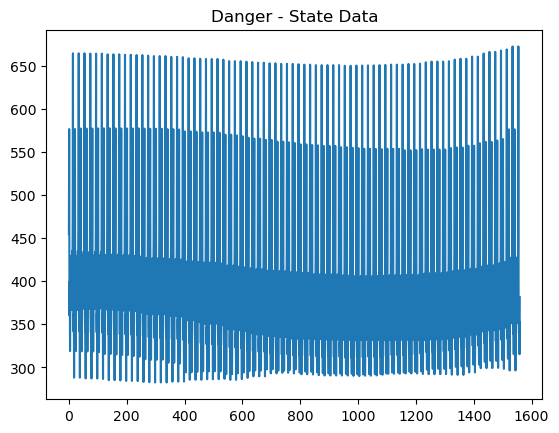

In [58]:
plt.plot(optical_flow_danger['Length'])
plt.title('Danger - State Data')
plt.show()

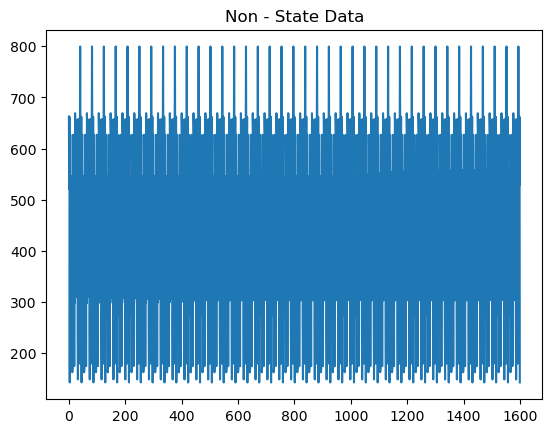

In [63]:
plt.plot(optical_flow_non['Length'][:1600])
plt.title('Non - State Data')
plt.show()

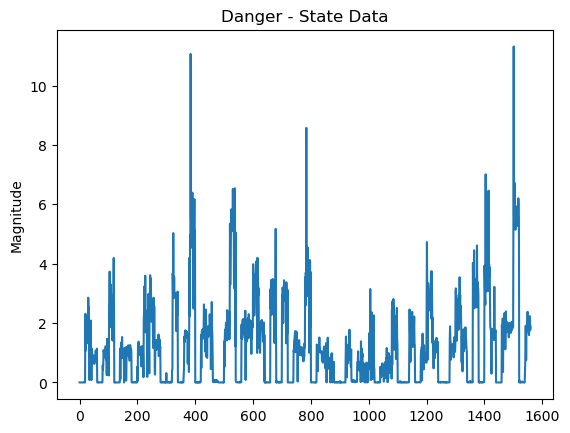

In [64]:
plt.plot(optical_flow_danger['magnitude'])
plt.title('Danger - State Data')
plt.ylabel('Magnitude')
plt.show()

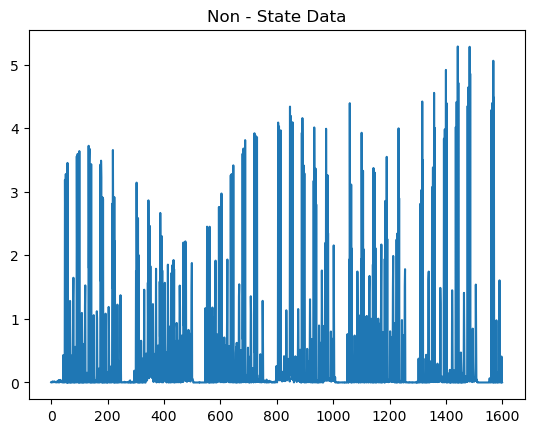

In [62]:
plt.plot(optical_flow_non['magnitude'][:1600])
plt.title('Non - State Data')
plt.show()

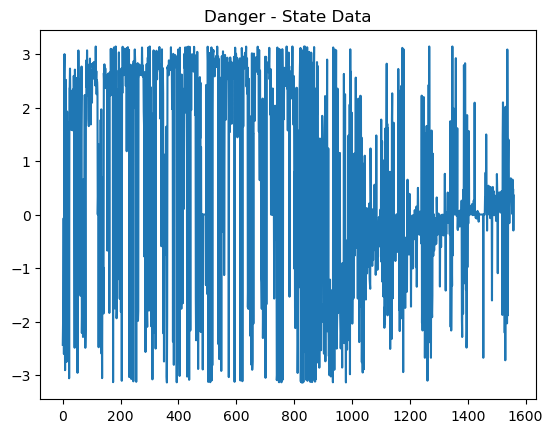

In [60]:
plt.plot(optical_flow_danger['angle'])
plt.title('Danger - State Data')
plt.show()

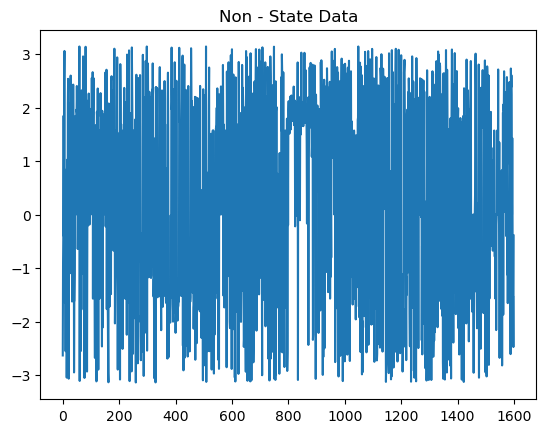

In [61]:
plt.plot(optical_flow_non['angle'][:1600])
plt.title('Non - State Data')
plt.show()

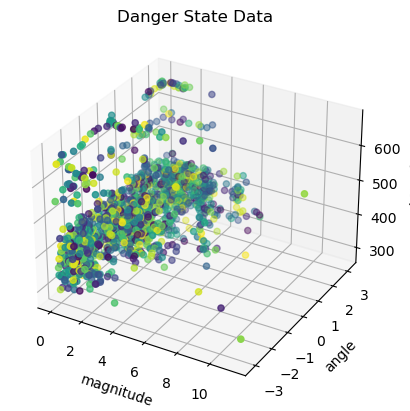

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data for the scatter plot
np.random.seed(0)
num_points = 1560
x = optical_flow_danger['magnitude']
y = optical_flow_danger['angle']
z = optical_flow_danger['Length']
colors = np.random.rand(num_points)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors, cmap='viridis')

# Set labels and title
ax.set_xlabel('magnitude')
ax.set_ylabel('angle')
ax.set_zlabel('Length')
ax.set_title('Danger State Data')

# Show the plot
plt.show()

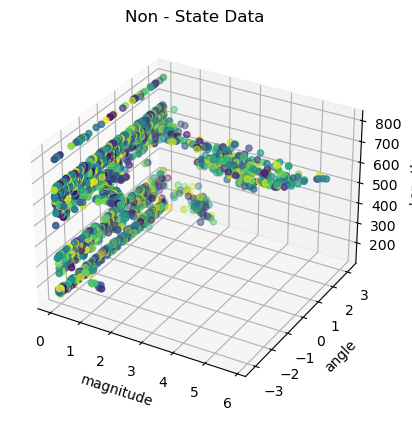

In [55]:
# Danger State Dataimport numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data for the scatter plot
np.random.seed(0)
num_points = 2503
x = optical_flow_non['magnitude']
y = optical_flow_non['angle']
z = optical_flow_non['Length']
colors = np.random.rand(num_points)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors, cmap='viridis')

# Set labels and title
ax.set_xlabel('magnitude')
ax.set_ylabel('angle')
ax.set_zlabel('Length')
ax.set_title('Non - State Data')

# Show the plot
plt.show()